In [4]:
#1
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from numpy import array
import numpy as np     # for mathematic equation
from nltk.corpus import stopwords   # to get collection of stopwords
from sklearn.model_selection import train_test_split       # for splitting dataset
from tensorflow.keras.preprocessing.text import Tokenizer  # to encode text to int
from tensorflow.keras.preprocessing.sequence import pad_sequences   # to do padding or truncating
from tensorflow.keras.models import Sequential     # the model
from tensorflow.keras.layers import Embedding, LSTM, Dense # layers of the architecture
from tensorflow.keras.callbacks import ModelCheckpoint   # save model
from tensorflow.keras.models import load_model   # load saved model
import re

ModuleNotFoundError: No module named 'absl'

In [5]:
#2
movie_reviews = pd.read_csv("IMDB Dataset.csv")
movie_reviews.isnull().values.any()
movie_reviews.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [12]:
movie_reviews["review"][3]

"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them."

<AxesSubplot:xlabel='sentiment', ylabel='count'>

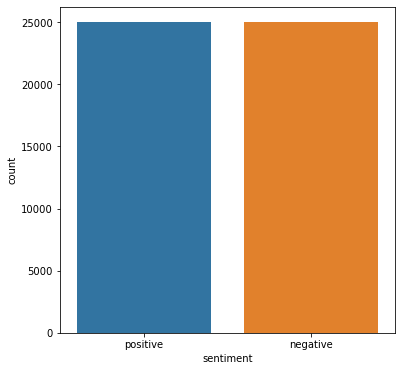

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
sns.countplot(x='sentiment', data=movie_reviews)

In [9]:
#4
import nltk
nltk.download('stopwords')
def preprocess_text(data):
    stop = stopwords.words('english')
    punct = '''!"#$%&'()*+,-/:;<=>?@[\]^_`{|}~'''
    #print(stop)
    #Make lower
    data['review'] = data['review'].str.lower()
    #Remove stopwords
    data['review'] = data['review'].apply(lambda x:' '.join([words for words in x.split() if words not in stop]))
    #Remove punctuations
    data['review'] = data['review'].str.translate(str.maketrans('', '', punct))
    data['word_count'] = data['review'].str.split().str.len()
    return data
movie_reviews = preprocess_text(movie_reviews)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
Train.head()

,review,sentiment,word_count
0,one reviewers mentioned watching 1 oz episode ...,positive,174
1,wonderful little production. br br the filming...,positive,96
2,thought wonderful way spend time hot summer we...,positive,90
3,basically theres family little boy jake thinks...,negative,73
4,petter matteis love time money visually stunni...,positive,134


In [31]:
X[3]

'basically theres family little boy jake thinks theres zombie closet parents fighting time br br this movie slower soap opera suddenly jake decides become rambo kill zombie br br ok first going make film must decide thriller drama drama movie watchable parents divorcing arguing like real life jake closet totally ruins film expected see boogeyman similar movie instead watched drama meaningless thriller spots br br well playing parents descent dialogs shots jake ignore them '

Text(0.5, 1.0, 'Kernel Distribution of Number of words')

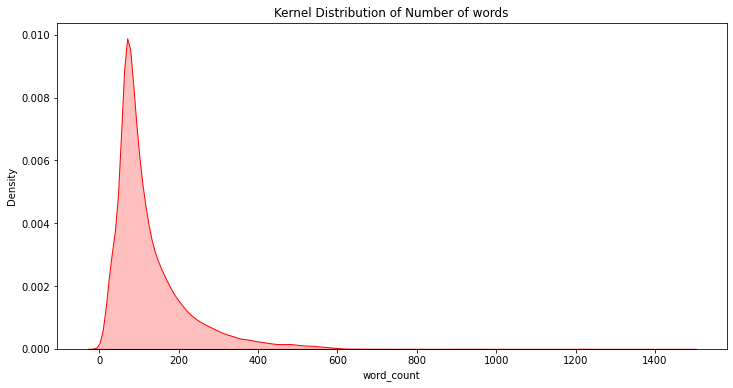

In [32]:
plt.figure(figsize=(12,6))
sns.kdeplot(Train['word_count'],shade=True,color='r').set_title('Kernel Distribution of Number of words')

In [35]:
movie_reviews1 = pd.read_csv("IMDB Dataset.csv")

In [36]:
movie_reviews1['word_count'] = movie_reviews['review'].str.split().str.len()

Text(0.5, 1.0, 'Kernel Distribution of Number of words')

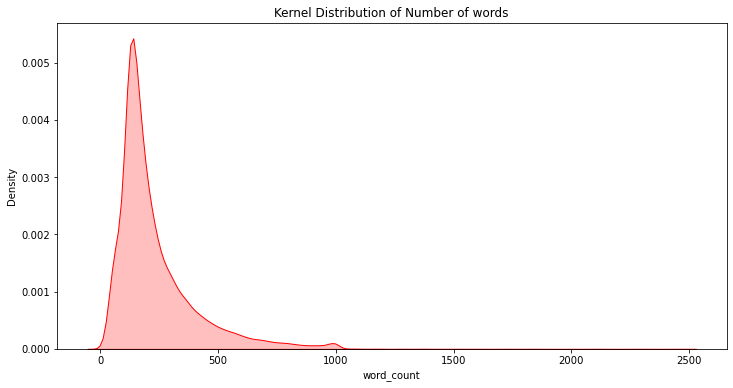

In [40]:
plt.figure(figsize=(12,6))
sns.kdeplot(movie_reviews1['word_count'],shade=True,color='r').set_title('Kernel Distribution of Number of words')

In [25]:
import tensorflow
import pandas as pd    # to load dataset
import numpy as np     # for mathematic equation
from nltk.corpus import stopwords   # to get collection of stopwords
from sklearn.model_selection import train_test_split       # for splitting dataset
from tensorflow.keras.preprocessing.text import Tokenizer  # to encode text to int
from tensorflow.keras.preprocessing.sequence import pad_sequences   # to do padding or truncating
from tensorflow.keras.models import Sequential     # the model
from tensorflow.keras.layers import Embedding, LSTM, Dense # layers of the architecture
from tensorflow.keras.callbacks import ModelCheckpoint   # save model
from tensorflow.keras.models import load_model   # load saved model
import re

ModuleNotFoundError: No module named 'tensorflow'

In [35]:
data = pd.read_csv('IMDB Dataset.csv')
print(data)

                                                  review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]


In [21]:
x_data[3]

['basically',
 'family',
 'little',
 'boy',
 'jake',
 'thinks',
 'zombie',
 'closet',
 'parents',
 'fighting',
 'time',
 'this',
 'movie',
 'slower',
 'soap',
 'opera',
 'suddenly',
 'jake',
 'decides',
 'become',
 'rambo',
 'kill',
 'zombie',
 'ok',
 'first',
 'going',
 'make',
 'film',
 'must',
 'decide',
 'thriller',
 'drama',
 'as',
 'drama',
 'movie',
 'watchable',
 'parents',
 'divorcing',
 'arguing',
 'like',
 'real',
 'life',
 'and',
 'jake',
 'closet',
 'totally',
 'ruins',
 'film',
 'i',
 'expected',
 'see',
 'boogeyman',
 'similar',
 'movie',
 'instead',
 'watched',
 'drama',
 'meaningless',
 'thriller',
 'spots',
 'well',
 'playing',
 'parents',
 'descent',
 'dialogs',
 'as',
 'shots',
 'jake',
 'ignore']

In [39]:
def load_dataset():
    df = pd.read_csv('IMDB Dataset.csv')
    x_data = df['review']       # Reviews/Input
    y_data = df['sentiment']    # Sentiment/Output
    z_data = []

    # PRE-PROCESS REVIEW
    x_data = x_data.replace({'<.*?>': ''}, regex = True)          # remove html tag
    x_data = x_data.replace({'[^A-Za-z]': ' '}, regex = True)     # remove non alphabet
    z_data = x_data.str.split().str.len()
    x_data = x_data.apply(lambda review: [w for w in review.split() if w not in english_stops])  # remove stop words
    x_data = x_data.apply(lambda review: [w.lower() for w in review])   # lower case
    
    # ENCODE SENTIMENT -> 0 & 1
    y_data = y_data.replace('positive', 1)
    y_data = y_data.replace('negative', 0)

    return x_data, y_data, z_data

x_data, y_data , z_data = load_dataset()

print('Reviews')
print(x_data, '\n')
print('Sentiment')
print(y_data)

Reviews
0        [one, reviewers, mentioned, watching, oz, epis...
1        [a, wonderful, little, production, the, filmin...
2        [i, thought, wonderful, way, spend, time, hot,...
3        [basically, family, little, boy, jake, thinks,...
4        [petter, mattei, love, time, money, visually, ...
                               ...                        
49995    [i, thought, movie, right, good, job, it, crea...
49996    [bad, plot, bad, dialogue, bad, acting, idioti...
49997    [i, catholic, taught, parochial, elementary, s...
49998    [i, going, disagree, previous, comment, side, ...
49999    [no, one, expects, star, trek, movies, high, a...
Name: review, Length: 50000, dtype: object 

Sentiment
0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: int64


In [27]:
print(x_data)

0        [one, reviewers, mentioned, watching, oz, epis...
1        [a, wonderful, little, production, the, filmin...
2        [i, thought, wonderful, way, spend, time, hot,...
3        [basically, family, little, boy, jake, thinks,...
4        [petter, mattei, love, time, money, visually, ...
                               ...                        
49995    [i, thought, movie, right, good, job, it, crea...
49996    [bad, plot, bad, dialogue, bad, acting, idioti...
49997    [i, catholic, taught, parochial, elementary, s...
49998    [i, going, disagree, previous, comment, side, ...
49999    [no, one, expects, star, trek, movies, high, a...
Name: review, Length: 50000, dtype: object


<AxesSubplot:xlabel='sentiment', ylabel='count'>

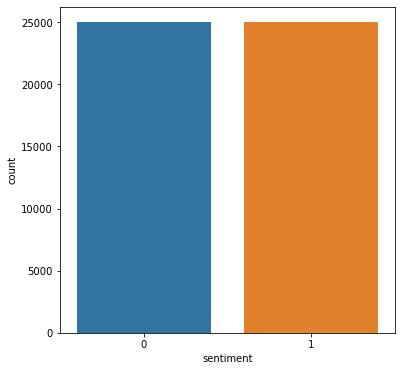

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,6))
sns.countplot(x=y_data)

130

Text(0.5, 1.0, 'Kernel Distribution of Number of words')

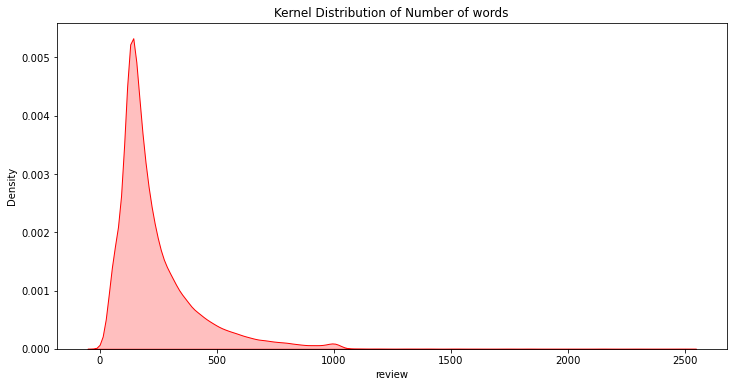

In [1]:
conda install -c conda-forge keras conda install -c

ModuleNotFoundError: No module named 'tensorflow'

2487
131
234.13926
176.0
30100.728361219622
173.49561481841442
